In [1]:
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import matplotlib as mpl
import matplotlib.pyplot as plt
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import math
import pims
import trackpy as tp
# change the following to %matplotlib notebook for interactive plotting

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

print()

#v = gray(pims.open(r'C:\Users\Tanner Lab\Desktop\Tanner Lab\anaconda\videos\trackingvid.mp4'))

v = gray(pims.open(r'C:\Users\Tanner Lab\Desktop\Tanner Lab\anaconda\videos\trackingvid.mp4'))


In [2]:
v

(PyAVReaderTimed,) processed through proc_func. Original repr:
    <Frames>
    Format: H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10
    Source: C:\Users\Tanner Lab\Desktop\Tanner Lab\anaconda\videos\trackingvid.mp4
    Duration: 30.932 seconds
    Frame rate: 0.938 fps
    Length: 28 frames
    Frame Shape: (2048, 2044, 3)
    

Frame([[30, 30, 30, ..., 33, 33, 33],
       [30, 30, 30, ..., 33, 33, 33],
       [30, 30, 30, ..., 33, 33, 33],
       ...,
       [31, 31, 31, ..., 34, 34, 34],
       [31, 31, 31, ..., 34, 34, 34],
       [31, 31, 31, ..., 34, 34, 34]], dtype=uint8)
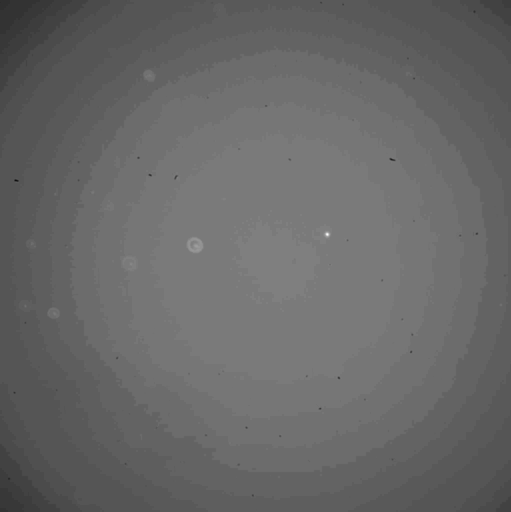

In [3]:
v[0]

In [4]:
#print(len(v[0]), len(v[0][0]))
#print()
#print(math.sqrt(len(v[0])*len(v[0][0])/200))


f = tp.locate(v[0], 5, invert=False )

In [5]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,7.000000,1282.710921,4.320756,1.264742,1.526144,1.489597,471.0,-0.164041,0
1,7.978525,1289.548086,9.909058,1.388226,0.288930,1.609875,503.0,-0.286527,0
2,8.701053,344.701053,4.394774,0.773237,0.672535,1.767162,464.0,-0.150013,0
3,9.516245,853.000000,2.562847,0.695525,0.067164,1.323058,497.0,-0.251339,0
4,13.253226,1281.122581,5.736336,1.119476,0.713287,1.767162,491.0,-0.223848,0


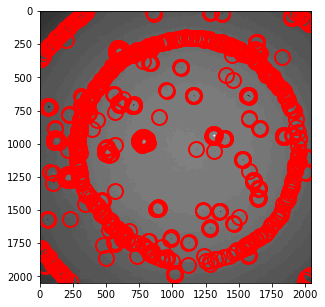

<AxesSubplot:>

In [6]:
tp.annotate(f, v[0])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

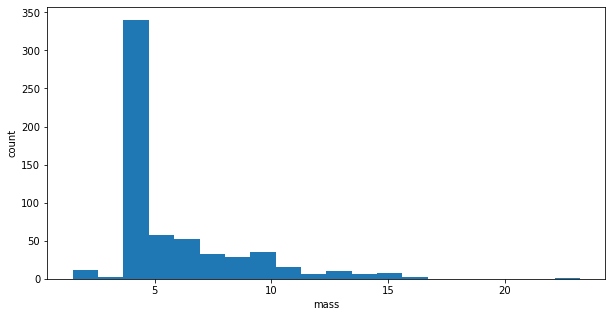

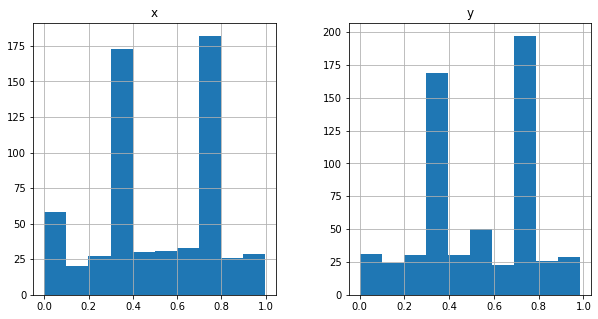

In [7]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');
tp.subpx_bias(f)

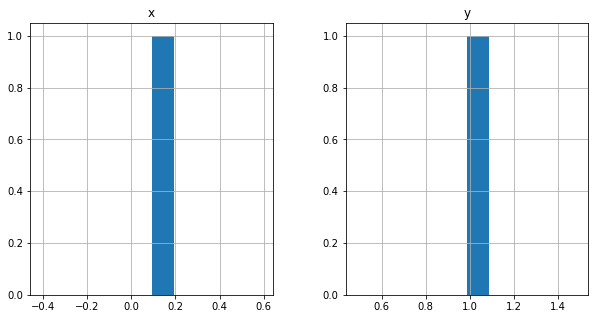

In [8]:
tp.subpx_bias(tp.locate(v[0], 5, invert=False, minmass=20));

In [117]:
f = tp.batch(v[:20], 5, minmass=20, invert=False); 
# v[:#] is the start of the video to the frame # desired

Frame 4: 1 features


C:\ProgramData\Anaconda3\lib\site-packages\pims\pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


ValueError: generator already executing

In [ ]:
t = tp.link(f, 5, memory=3) # f, displacement in pixels, memory is number of frames backwards incase particle slips out of sight

In [ ]:
t.head()

In [ ]:
t1 = tp.filter_stubs(t, 3)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

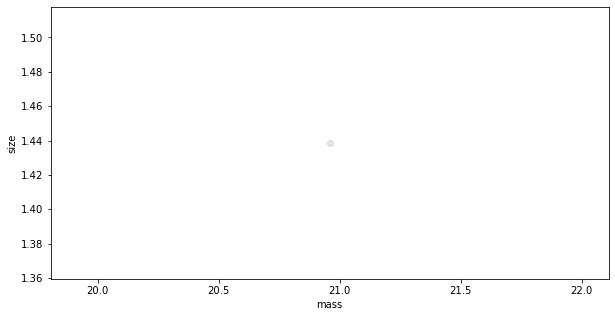

In [13]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [14]:
t2 = t1[((t1['mass'] > 20) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]
print(t2)

                y            x       mass      size       ecc    signal  \
frame                                                                     
3      926.953628  1299.063547  20.826720  1.446038  0.090432  2.047797   
4      930.099422  1297.068894  22.684054  1.430456  0.145613  2.386318   
5      929.164292  1295.187444  20.701843  1.421749  0.131448  2.341170   
7      925.985915  1292.973592  20.227704  1.461357  0.039165  2.199051   
8      924.935688  1291.947011  20.351589  1.433458  0.165065  2.267432   

       raw_mass        ep  frame  particle  
frame                                       
3         909.0  0.033948      3         2  
4         940.0  0.031286      4         2  
5         939.0  0.031334      5         2  
7         938.0  0.031480      7         2  
8         900.0  0.034846      8         2  


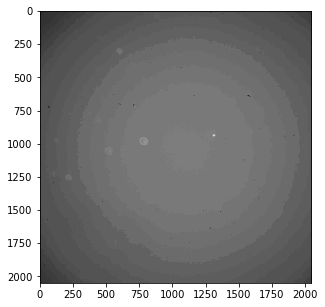

In [15]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], v[0]);

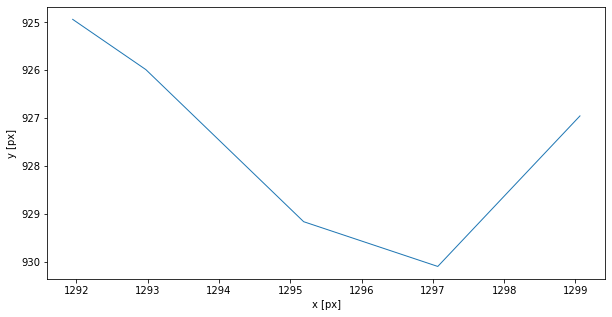

In [16]:
plt.figure()
tp.plot_traj(t2);

In [22]:
0.938 * 10 # seconds long, manually calculate for now...

9.379999999999999

In [21]:
print(t2)

                y            x       mass      size       ecc    signal  \
frame                                                                     
3      926.953628  1299.063547  20.826720  1.446038  0.090432  2.047797   
4      930.099422  1297.068894  22.684054  1.430456  0.145613  2.386318   
5      929.164292  1295.187444  20.701843  1.421749  0.131448  2.341170   
7      925.985915  1292.973592  20.227704  1.461357  0.039165  2.199051   
8      924.935688  1291.947011  20.351589  1.433458  0.165065  2.267432   

       raw_mass        ep  frame  particle  
frame                                       
3         909.0  0.033948      3         2  
4         940.0  0.031286      4         2  
5         939.0  0.031334      5         2  
7         938.0  0.031480      7         2  
8         900.0  0.034846      8         2  


In [23]:
print(t2['y'], t2['x'])

frame
3    926.953628
4    930.099422
5    929.164292
7    925.985915
8    924.935688
Name: y, dtype: float64 frame
3    1299.063547
4    1297.068894
5    1295.187444
7    1292.973592
8    1291.947011
Name: x, dtype: float64


In [39]:
"""
def distance

def calculate_distance_traveled(xs, ys, time=0.938):
    #for x, y in zip(xs, ys):
    #    print(x, y)
    for i in range(len(xs)-2):

"""
mpp = 10000/2048
print(tp.motion.imsd(t2, mpp,0.983 ))        
# second_col/(4*lag time)
# second_col = microns^2
data = tp.motion.imsd(t2, mpp, 0.983)

                        2
lag time [s]             
1.017294       162.488833
2.034588       416.212385
3.051882       739.979063
4.069176      1083.873035
5.086470      1304.558789


In [57]:
print(data[2])
print(type(data[2]))

lag time [s]
1.017294     162.488833
2.034588     416.212385
3.051882     739.979063
4.069176    1083.873035
5.086470    1304.558789
Name: 2, dtype: float64
<class 'pandas.core.series.Series'>


In [73]:
microns_sq = np.vstack(data[2])[:,0]
print(microns_sq)


[ 162.48883335  416.21238467  739.97906298 1083.87303548 1304.55878946]


In [99]:
print(data.columns.values)
print(data.head())

[2]
                        2
lag time [s]             
1.017294       162.488833
2.034588       416.212385
3.051882       739.979063
4.069176      1083.873035
5.086470      1304.558789


In [ ]:
#lag_time = data['lag time [s]']

In [107]:
data.to_csv("test.csv")
array = np.genfromtxt('test.csv', skip_header=1, delimiter=',')
print(array)

[[1.01729400e+00 1.62488833e+02]
 [2.03458800e+00 4.16212385e+02]
 [3.05188199e+00 7.39979063e+02]
 [4.06917599e+00 1.08387304e+03]
 [5.08646999e+00 1.30455879e+03]]


In [109]:
lag_time = array[:,0]
microns_sq = array[:,1]
print(microns_sq)
print(lag_time)

[ 162.48883335  416.21238467  739.97906298 1083.87303548 1304.55878946]
[1.017294   2.034588   3.05188199 4.06917599 5.08646999]


In [111]:
dif_co = microns_sq[-1] / (4*lag_time[-1])

In [116]:
dif_co_m_sq_per_s = dif_co * (1E-6**2)
print(dif_co_m_sq_per_s)

6.411906450219205e-11
